<img src="https://929687.smushcdn.com/2407837/wp-content/themes/pyi/assets/images/logo.png?lossy=1&strip=1&webp=1" width="300"/>

**by: [João Ataíde](https://www.joaoataide.com/)**
___

In [91]:
import cv2
import argparse
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

In [92]:
def plt_imshow(title, image):
    # convert the image frame BGR to RGB color space and display it
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    plt.figure(figsize=(10, 10))
    plt.imshow(image)
    plt.title(title)
    plt.grid(False)
    plt.axis('off')
    plt.show()

## **Load Data**

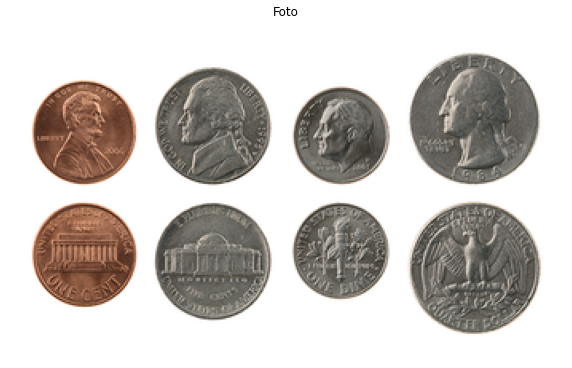

In [93]:
PASTA  = r"D:\Estudos\PyImageSearch\PyImageSearch Gurus\Modulo 1 - Computer Vision Basics"
args = {"image": f"{PASTA}\\coins02.png"}
image = cv2.imread(args["image"])
plt_imshow("Foto", image)

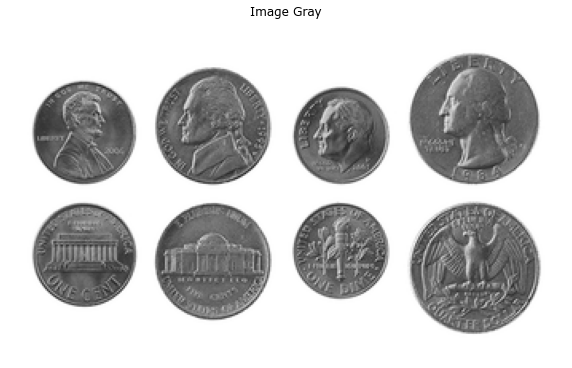

In [94]:
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt_imshow("Image Gray", gray)

### Simple Thresholding
Thresholding is a binarization of image. In geral convert a grayscale and to a binary image, where the pixels either 0 or 255.

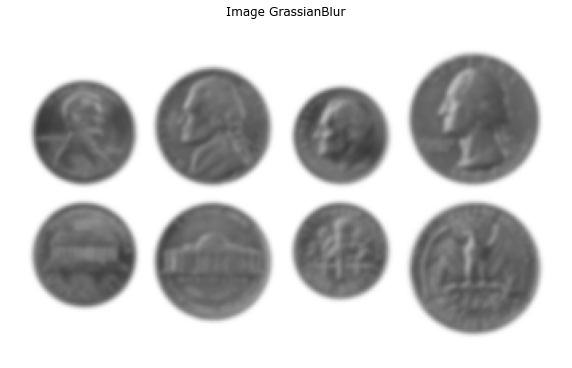

In [95]:
blurred = cv2.GaussianBlur(gray, (7,7), 0)
plt_imshow("Image GrassianBlur", blurred)

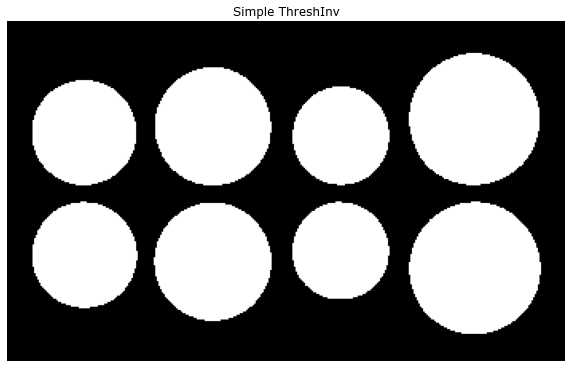

In [96]:
(T, threshInv) = cv2.threshold(blurred, 200, 255, cv2.THRESH_BINARY_INV)
plt_imshow("Simple ThreshInv", threshInv)

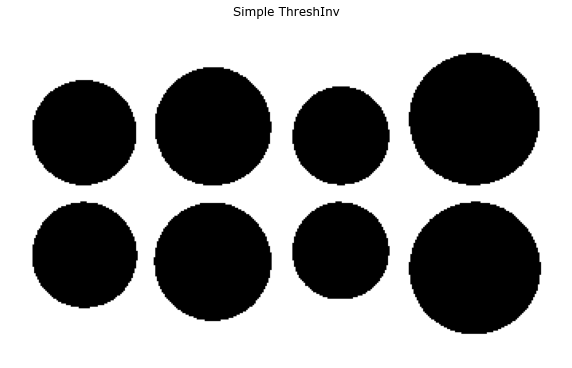

In [97]:
(T, thresh) = cv2.threshold(blurred, 200, 255, cv2.THRESH_BINARY)
plt_imshow("Simple ThreshInv", thresh)

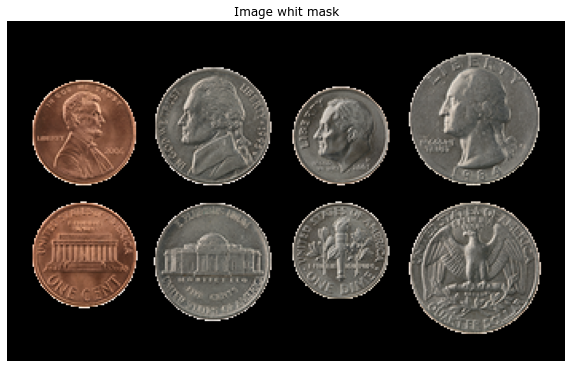

In [98]:
only_image = cv2.bitwise_and(image, image, mask = threshInv)
plt_imshow("Image whit mask", only_image)

### Otsu`s Method

We need on simple thersholdin take manually supplu value of T. but, in Otsu`s method assume that iamge constains two classes of pixels? backgroud and the foregraound, so the metod makes assumption that the grayscale histogram is bi-modal.

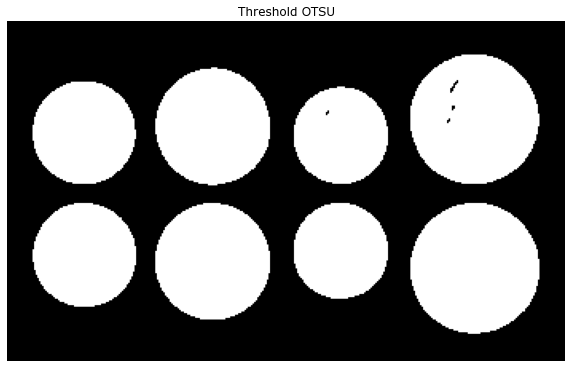

In [99]:
(T, threshInv) = cv2.threshold(blurred, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)
plt_imshow("Threshold OTSU", threshInv)

### Adaptative Thresholding

To aid us in automatically detemining the value of T, we leveraged Otsu`s method. And while Otsu`s method can save us a lot of time "guess and checking"

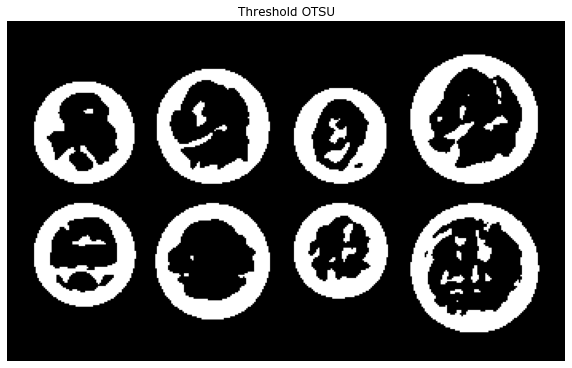

In [100]:
threshInv = cv2.adaptiveThreshold(blurred, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY_INV, 25, 15)
plt_imshow("Threshold OTSU", threshInv)

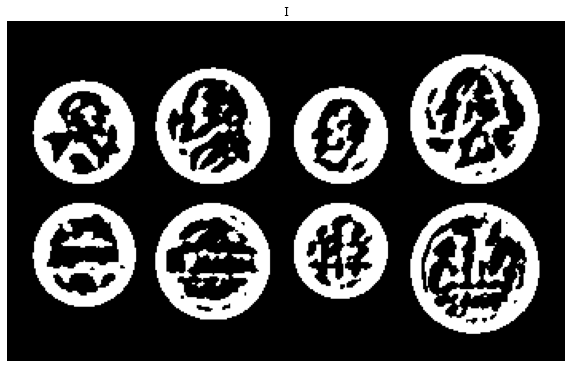

In [101]:
from skimage.filters import threshold_local

T = threshold_local(blurred, 29, offset=5, method="gaussian")
thresh = (blurred < T).astype("uint8") * 255
plt_imshow("I", thresh)